## 공급계약체결에 따른 주가 등락률 분석(결측치 제거 X)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 주가 등락률 데이터 로등해서 df_sct, df_scc 에 담기
df_scc = pd.read_csv("datas/scc_fluctuation.csv", encoding="cp949")
df_scc.shape

(4160, 4)

In [4]:
df_scc.head()

,2.82,000210,2019-08-20,2019-08-20.1
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [5]:
df_scc.columns =["fluctuation", "ticker", "reception_date", "registration_date"]
df_scc.head()

,fluctuation,ticker,reception_date,registration_date
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [10]:
modify_data = df_scc.drop(['reception_date', 'registration_date'], axis= 'columns')

(array([[4160.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.],
        [2484.,  511.,  669.,  454.,   19.,    0.,    0.,    0.,    0.,
           23.]]),
 array([-2.97600000e+01,  9.49942160e+04,  1.90018192e+05,  2.85042168e+05,
         3.80066144e+05,  4.75090120e+05,  5.70114096e+05,  6.65138072e+05,
         7.60162048e+05,  8.55186024e+05,  9.50210000e+05]),
 <a list of 2 BarContainer objects>)

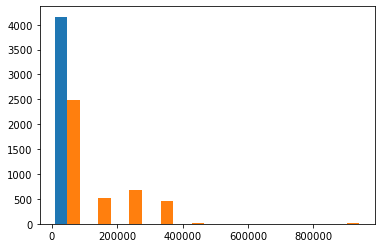

In [11]:
plt.hist(modify_data)

In [12]:
modify_data.describe()

,fluctuation,ticker
count,4160.000000,4160.000000
mean,0.859118,115958.216346
std,4.069246,127889.109577
min,-29.760000,150.000000
25%,-0.960000,13120.000000
50%,0.450000,64510.000000
75%,2.312500,222110.000000
max,29.950000,950210.000000


In [15]:
modify_data["ticker"].style.set_precision(0)

AttributeError: 'Series' object has no attribute 'style'

In [16]:
modify_data = modify_data["ticker"].astype(int)

In [17]:
modify_data.describe()

count      4160.000000
mean     115958.216346
std      127889.109577
min         150.000000
25%       13120.000000
50%       64510.000000
75%      222110.000000
max      950210.000000
Name: ticker, dtype: float64

In [18]:
modify_data.head()

0    264660
1    241790
2     17940
3    143540
4      9440
Name: ticker, dtype: int32

In [19]:
modify_data = df_scc.drop(['reception_date', 'registration_date'], axis= 'columns')

In [20]:
df_scc.columns =["fluctuation", "ticker", "reception_date", "registration_date"]

In [21]:
df_scc.head()

,fluctuation,ticker,reception_date,registration_date
0,29.60,264660,2019-08-20,2019-08-20
1,1.50,241790,2019-08-20,2019-08-20
2,0.00,17940,2019-08-21,2019-08-21
3,3.78,143540,2019-08-21,2019-08-21
4,0.37,9440,2019-08-22,2019-08-22


In [22]:
modify_data = df_scc.drop(['reception_date', 'registration_date'], axis= 'columns')

In [23]:
modify_data.head()

,fluctuation,ticker
0,29.60,264660
1,1.50,241790
2,0.00,17940
3,3.78,143540
4,0.37,9440


In [24]:
modify_data.describe()

,fluctuation,ticker
count,4160.000000,4160.000000
mean,0.859118,115958.216346
std,4.069246,127889.109577
min,-29.760000,150.000000
25%,-0.960000,13120.000000
50%,0.450000,64510.000000
75%,2.312500,222110.000000
max,29.950000,950210.000000


In [25]:
modify_data.dtypes

fluctuation    float64
ticker           int64
dtype: object

In [26]:
modify_data = modify_data.drop('ticker', axis = 'columns')

In [27]:
modify_data.head()

,fluctuation
0,29.60
1,1.50
2,0.00
3,3.78
4,0.37


array([[<AxesSubplot:title={'center':'fluctuation'}>]], dtype=object)

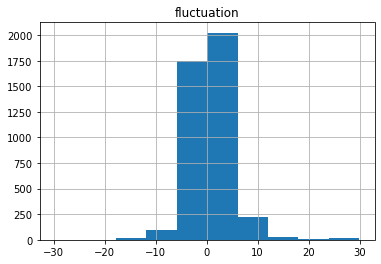

In [28]:
modify_data.hist()

In [29]:
modify_data.describe()

,fluctuation
count,4160.000000
mean,0.859118
std,4.069246
min,-29.760000
25%,-0.960000
50%,0.450000
75%,2.312500
max,29.950000


Text(0.5, 1.0, 'Histogram')

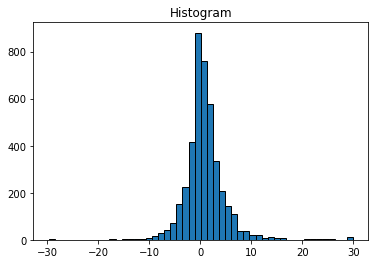

In [35]:
plt.hist(modify_data, bins= 50, edgecolor='black')
plt.title('Histogram')

In [41]:
modify_data.loc[modify_data['fluctuation'] >= 0].shape[0]

2607

In [38]:
modify_data.loc[modify_data['fluctuation'] < 0].shape[0]

1553

 공급계약체결을 기준으로 하는 데이터 4160개
 그 중 변동률(fluctuation)이 0 보다 크거나 같은 개수 2607개
 그리고 변동률이 0 보다 작은 개수 1553개
 
 ### 즉,62.66 %의 확률로 주가에 긍정적인 영향을 미침.